#heatmaps 

Heatmaps são uteis em situações muito especificas, por exemplo quando vc esta traçando areas com maiores chances de acontecer alguma previsão, ou tentando localizar algo. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


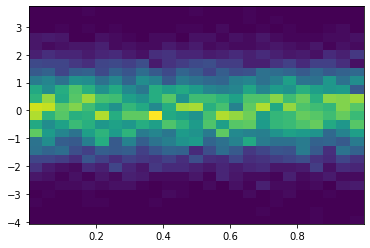

In [9]:
plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)# usando heatmaps 

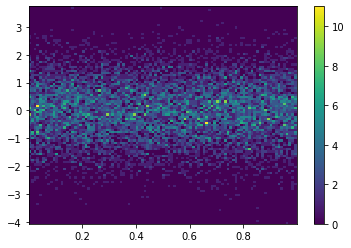

In [12]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)#aumentando o numero de bins 

# Adicionando uma barra lateral de legenda de cor 
plt.colorbar()

#animação 

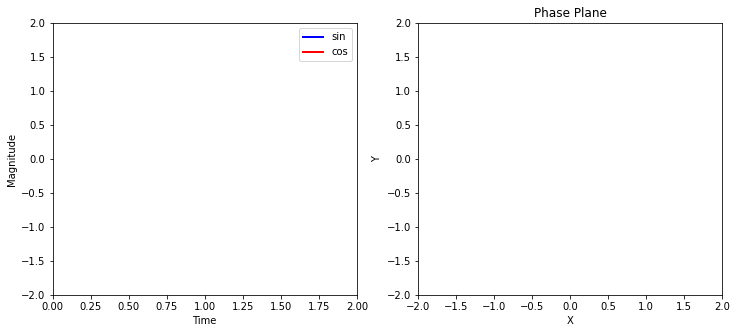

In [33]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# criando uma figura e dois subplots dentro dela 
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# setando o ax1 
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

# setando o ax2
ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

#criando objetos que vão mudar durante a animação começando em branco
# e vai ganhando novos valores a cada frame da animação 
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot retorna uma lista de 2d objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);


#criando a função que desenha a cada frame 
A função de animação é uma função que você define para desenhar quadros individuais na animação. A variável n será o número do quadro. A função desenha o quadro redefinindo os valores de dados para os objetos globais txt_title, line1, line2, pt1 e line3 que foram definidos acima.

In [34]:
#criando uma função de animação 
def drawframe(n):
    x = np.linspace(0, 2, 1000)
    y1 = np.sin(2 * np.pi * (x - 0.01 * n))
    y2 = np.cos(2 * np.pi * (x - 0.01 * n))
    line1.set_data(x, y1)
    line2.set_data(x, y2)
    line3.set_data(y1[0:50],y2[0:50])
    pt1.set_data(y1[0],y2[0])
    txt_title.set_text('Frame = {0:4d}'.format(n))
    return (line1,line2)

#Criando a animação 
A classe de animação inclui uma função FuncAnimation que incorpora uma função especificada pelo usuário para atualizar a figura para cada quadro da animação. O resultado é um objeto de animação que é subsequentemente chamado para produzir a animação desejada.

In [35]:
from matplotlib import animation
# blit=True redesenha apenas as partes que foram alteradas.
anim = animation.FuncAnimation(fig, drawframe, frames=100, interval=20, blit=True)

In [36]:
from IPython.display import HTML
HTML(anim.to_html5_video())